

Colin Smith

## Predicting passenger survival on the *Titanic*

Based on the [*Titanic - Machine Learning from Disaster*](https://www.kaggle.com/c/titanic) challenge from [Kaggle](https://www.kaggle.com/).
The dataset is from the [Vanderbilt Biostatistics Datasets](https://hbiostat.org/data/).

## Overview

In this challenge you will use machine learning to create a model that predicts which passengers survived the *Titanic* shipwreck.

The sinking of the *Titanic* is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" *RMS Titanic* sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

![RMS Titanic](https://www.history.com/.image/c_limit%2Ccs_srgb%2Cfl_progressive%2Ch_2000%2Cq_auto:good%2Cw_2000/MTU3ODc5MDg2Njk4ODAwNDU3/rms-sailing-from-southampton.jpg)

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, you will build a predictive model that answers the question: "What are the attributes of the people who were more likely to survive the sinking of the *Titanic*?" using passenger data (*i.e.* name, age, gender, socio-economic class, *etc.*).

## Data

In this challenge, you will use a dataset that include passenger information like name, age, gender, socio-economic class, *etc*. This dataset is available as a file named [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv).

The file [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) contains the details of the 1309 passengers on board and importantly, will reveal whether they survived or not.
The dataset file details include:

*   `pclass`: passenger class; proxy for socio-economic status (1st ~ upper, 2nd ~ middle, 3rd ~ lower)
*   `survived`: survival status (0=No, 1=Yes)
*   `name`: passenger name
*   `sex`: passenger sex (male, female)
*   `age`: passenger age in years (fractional if age is less than 1; if age is estimated, it is in the form xx.5)
*   `sibsp`: number of siblings/spouses aboard (includes step-siblings; mistresses and fiances ignored)
*   `parch`: number of parents/children aboard (parent only considers mother or father; child includes stepchildren)
*   `ticket`: ticket number
*   `fare`: passenger fare (in pre-1970 British pounds)
*   `cabin`: cabin number
*   `embarked`: port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)
*   `boat`: lifeboat number (if passenger boarded one)
*   `body`: body identification number
*   `home.dest`: passenger home/destination

Using the concepts we have covered in class so far, develop a classification system that will learn patterns in the [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) data file and accurately predict whether a passenger will survive or not.

## Required components of your submission

Your *Google Colab* Jupyter notebook must include:

1.   all pertinent *exploratory data analysis* (EDA) code, visualizations, and **detailed** justifications;
2.   explanations/justifications for all model selection decisions;
3.   all pertinent model diagnostics, including metrics and visualizations; and
4.   your final model equation.

Be sure to check out or review the *Assignments/Projects* section of our [*Blackboard*](https://learn.csuchico.edu/) course page for details regarding expectations, requirements, and the [*Jupyter Notebook Rubric*](https://www.ecst.csuchico.edu/~bjuliano/Teaching/rubric-jupyter-notebook.pdf) that will be used to evaluate Jupyter notebook submissions.



# Solution

#Load the dependancies

In [ ]:
%%capture
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import io
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

<IPython.core.display.Javascript object>

##Organize and clean the data

#Analyze the data

In [ ]:
df = pd.read_csv('https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv')
columns = df.columns
print(columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


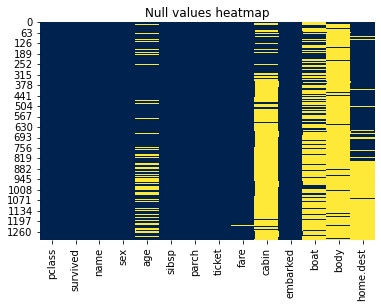

In [ ]:
ax = plt.axes()
sns.heatmap(df.isnull(), cmap = 'cividis', cbar=False, ax=ax)
ax.set_title('Null values heatmap')
plt.show()

Here we can see that their is a lot of nulls values in the home destination, body id, boat, and cabin number.
Using features like name, home destination and body id for our analysis wouldnt make sense so we will drop those three. Cabin Id unfortunately had too many null values and isnt numeric so it too will be removed. I also believe boat would be a bad feature, as its value is dependent if you made it off the ship, so I will remove it as well. The last one I will remove here is ticket, since from what I can tell doesn't mean anything once on the ship, and if it did we have pclass and fare for that. So we can remove it.

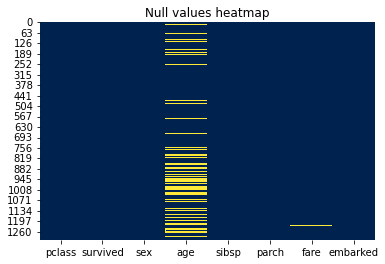

In [ ]:
df = df.drop(columns=['ticket','name','cabin', 'body', 'boat', 'home.dest'])
ax = plt.axes()
sns.heatmap(df.isnull(), cmap = 'cividis', cbar=False, ax=ax)
ax.set_title('Null values heatmap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


Now we can see that our graph isn't fully accurate, as embarked has a null value but it doesnt show up. We will have to fill the NA values for all 3

Before we can accurately describe the data we have to change any stings to numbers

In [ ]:
df['sex'].replace(['male', 'female'], [0, 1], inplace=True)
df['embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)

In [ ]:
df.describe()

Loading... (need help?)


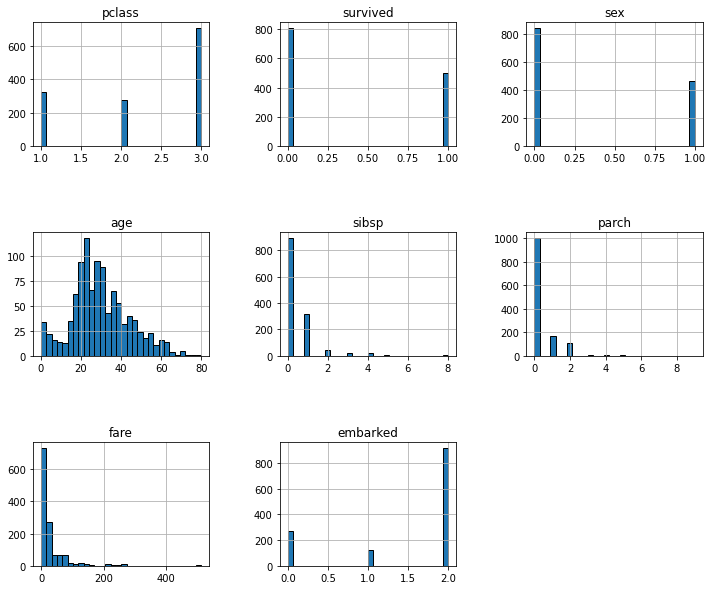

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

From this we can see that the average age was 29.88 we will round to 30 and use it to fill our missing nulls, and we only have one missing value for fare we will also just replace it with the mean rounded to 33, we can also see that embarked is mostly 2 so we will replace the two missing na values with 2.

In [ ]:
df['age'] = df['age'].fillna(30)
df['fare'] = df['fare'].fillna(33.29)
df['embarked'] = df['embarked'].fillna(2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


We can now see that indeed all of our values have the same number of non-null entries meaning we have no missing data.

One more thing I'd like to consider is the family size. Instead of number of parents and number of siblings, it would be size of the family you came with (if alone then 1).

In [ ]:
df['familySize'] = df["sibsp"] + df["parch"] + 1

Since we added familySize which is dependent on sibling and parents we should remove those.

In [ ]:
df = df.drop(columns=['sibsp', 'parch'])

              pclass  survived       sex       age      fare  embarked  \
pclass      1.000000 -0.312469 -0.124617 -0.365598 -0.558477  0.185479   
survived   -0.312469  1.000000  0.528693 -0.050596  0.244208 -0.175313   
sex        -0.124617  0.528693  1.000000 -0.057627  0.185484 -0.097960   
age        -0.365598 -0.050596 -0.057627  1.000000  0.171037 -0.071664   
fare       -0.558477  0.244208  0.185484  0.171037  1.000000 -0.237970   
embarked    0.185479 -0.175313 -0.097960 -0.071664 -0.237970  1.000000   
familySize  0.050027  0.026876  0.188583 -0.197179  0.226465  0.067598   

            familySize  
pclass        0.050027  
survived      0.026876  
sex           0.188583  
age          -0.197179  
fare          0.226465  
embarked      0.067598  
familySize    1.000000  
Index(['survived', 'sex', 'pclass'], dtype='object')


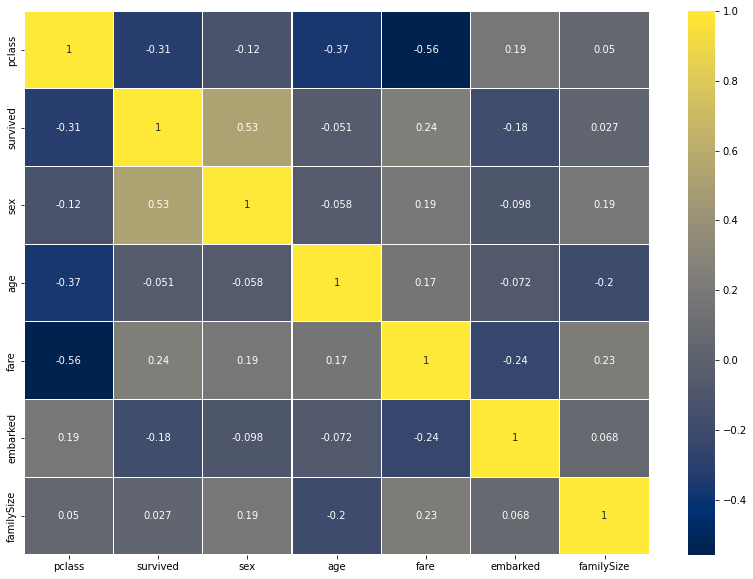

In [ ]:
corr = df.corr()
print(corr)
print(df.corr().abs().nlargest(3, 'survived').index)
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='cividis', annot=True, linewidths=0.2)

From this we can see the features that corrilated the most, and the ones that corrilated the least so lets check them out.

Pclass has a high corrilation value for survived so we will see how passenger class (Pclass) effected ones odds of survival.

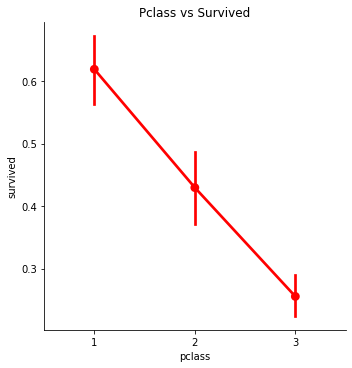

In [ ]:
sns.catplot(x="pclass", y="survived", data=df, kind="point", color = 'r')
plt.title("Pclass vs Survived")
plt.show()

The relation is basically linear, meaning it is very clear there is a solid relation between pclass and survivability. The higher the class the more likely the survival.

One thing that resinated with me was the fact that it is clear women were a priority, we can see that here.

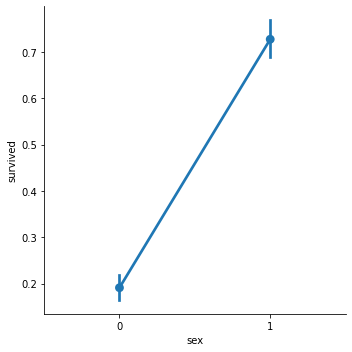

In [ ]:
sns.catplot(x="sex", y="survived", data=df, kind="point")

Remeber 0 is male and 1 is female. The despairity between the two is uncanny.
Which makes sence since the corrilation is high. Though I would expect a similar corrilation between age and survived considering at the time it was "save the women and children first".

I want to explore the relationship between age and survivability since its corrilation was lower than expected.

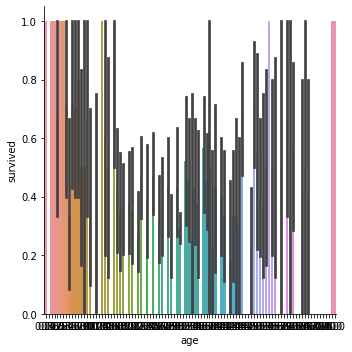

In [ ]:
sns.catplot(x="age", y="survived", data=df, kind ='bar')

This data is horribly organized but you can kind of see how the young children were actually a lot more likely to survive.

The next thing to look at would be the relation between sex and age

But first what is the distribution between male and female?

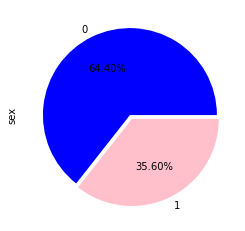

In [ ]:
explode = [0, 0.05]
df["sex"].value_counts().plot.pie(autopct="%1.2f%%", explode=explode, colors = ['b', 'pink'])

So its something to keep in mind, that their were almost double the males than females on the boat.

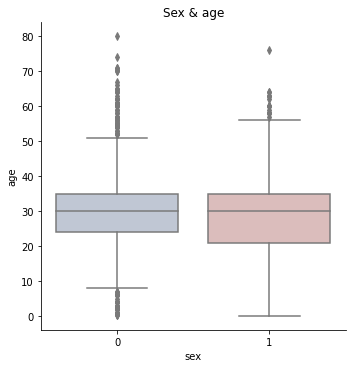

In [ ]:
sns.catplot(x="sex", y="age", data=df, palette = 'vlag', kind = 'box')
plt.title("Sex & age")
plt.show()

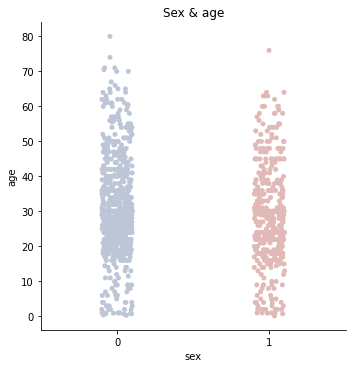

In [ ]:
sns.catplot(x="sex", y="age", data=df, palette = 'vlag')
plt.title("Sex & age")
plt.show()

From these two charts it clear that a majority of the population on the boat was adults starting at what looks like 18.
Though it looks like a majority of both men and women are around the ages from around 25 to 35, with women ranging a little lower at 20 to 35. Though they both have about the same mean at around 30.

So now lets add pclass and see how that effects things.

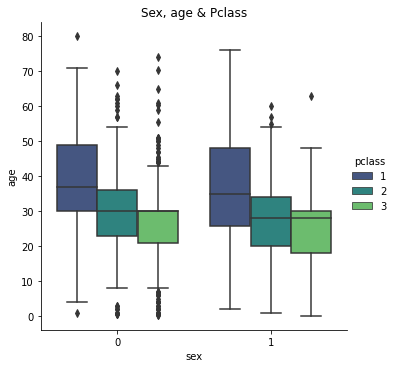

In [ ]:
sns.catplot(x="sex", y="age", data=df, kind="box", hue="pclass", palette = 'viridis')
plt.title("Sex, age & Pclass")
plt.show()

From this we can tell that the pclass distribution was fairly even over the sexs, but when it came to age, older people tended to be in a higher class.

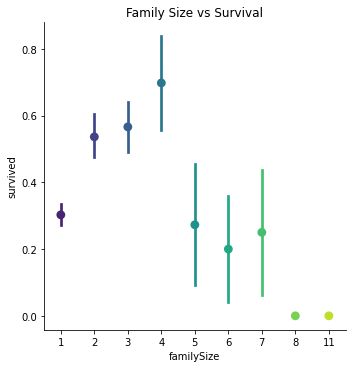

In [ ]:
sns.catplot(x="familySize", y="survived", data=df, kind="point", palette = 'viridis')
plt.title("Family Size vs Survival")
plt.show()

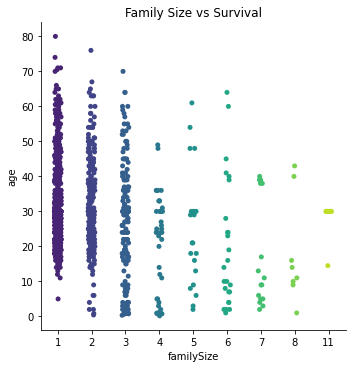

In [ ]:
sns.catplot(x="familySize", y="age", data=df, palette = 'viridis')
plt.title("Family Size vs Survival")
plt.show()

From these two charts its clear their is a relationship between your family size and whether or not you survived but also that your age corrilates on your family size. The second chart above shows that majority of kids came from families ranging in size from 3-7. This makes sense since, it would be unlikely for a child to come alone on the ship. But also that families of 2 would likely be a couple vs parent and child.

But first whats the distribution in family size since its hard to tell from above.

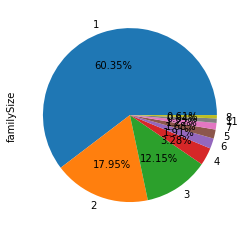

In [ ]:
df["familySize"].value_counts().plot.pie(autopct="%1.2f%%")

From this we can see that actually a majority of the passengers on the titanic came with out family, though I'm pretty sure that could still mean they came with a significant other.

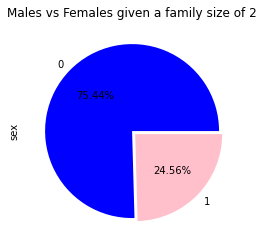

In [ ]:
df.loc[df['familySize'] == 1, 'sex'].value_counts().plot.pie(autopct="%1.2f%%", explode=explode, colors = ['b', 'pink'])
plt.title("Males vs Females given a family size of 2")
plt.show()

This tells us a lot though, as its clear a majority of the single passengers were male, which considering the difference in numbers of males and females across the whole boat, would mean most of that contrast between the two stems from single passengers. To confirm this I will show the data with single passengers removed.

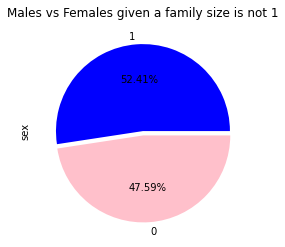

In [ ]:
explode = [0, 0.05]
df.loc[df['familySize'] != 1, 'sex'].value_counts().plot.pie(autopct="%1.2f%%", explode=explode, colors = ['b', 'pink'])
plt.title("Males vs Females given a family size is not 1")
plt.show()

This confirms my suspicion that the differnece in distribution between males and comes from the single passengers.

This makes me curious in the distribution between sexs when single riders have been removed. To start lets see how it looks again with single riders.

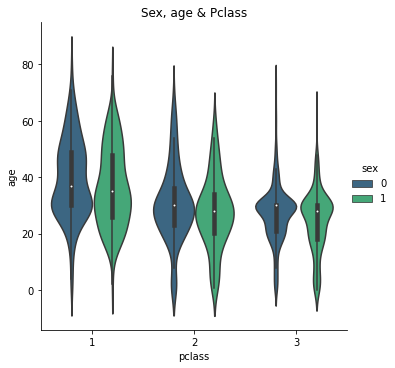

In [ ]:
sns.catplot(x="pclass", y="age", data=df, kind="violin", hue="sex", palette = 'viridis')
plt.title("Sex, age & Pclass")
plt.show()

Now we can drop all the values with family size 1 and see how it looks

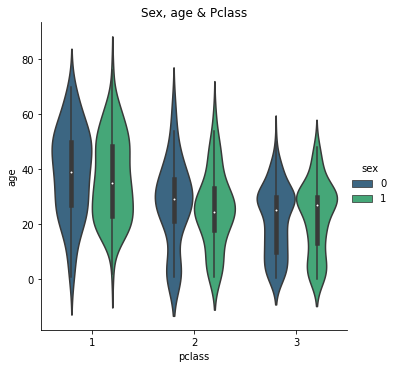

In [ ]:
dfDrop = df[df.familySize != 1]
sns.catplot(x="pclass", y="age", data=dfDrop, kind="violin", hue="sex", palette = 'viridis')
plt.title("Sex, age & Pclass")
plt.show()

You can see how the graph has changed, its only slight but their distribution is a lot more mirrored which means, families tend to have the same pclass and same distribution of males and females.

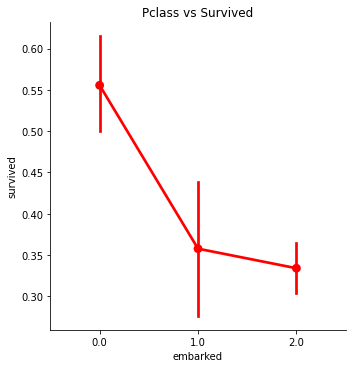

In [ ]:
sns.catplot(x="embarked", y="survived", data=df, kind="point", color = 'r')
plt.title("Pclass vs Survived")
plt.show()

This graph also shows us the importance of the station at which the passengers had to embark at to get on their life rafts. With 0 being Cherbourg, 1 being Queenstown, and 2 being Southampton.
Meaning if you left from Cherbourg you would have the highest chance of survival.

#Build and train the model

In [ ]:
dfDropS = df.drop(['survived'], axis=1)
x = dfDropS
Y = df['survived']

Here I split up the data into testing and training data with tesing geting 30% of the total data

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)

In [ ]:
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,
                y = Y)

# Get the parameters for this estimator
params = log_regress.get_params()
print('Model parameters:', params)


Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["Died", "Survived"]

#---get the predicted class labels and convert into a dataframe---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---get the actual diagnosis and convert into a dataframe---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]
original_result = original_result.reset_index(drop=True)

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result)

         Died  Survived  Prediction  Original Result
0    0.759176  0.240824           0                0
1    0.401319  0.598681           1                1
2    0.885732  0.114268           0                0
3    0.447357  0.552643           1                0
4    0.881619  0.118381           0                1
..        ...       ...         ...              ...
388  0.383345  0.616655           1                1
389  0.909429  0.090571           0                0
390  0.914571  0.085429           0                0
391  0.795852  0.204148           0                0
392  0.884682  0.115318           0                0

[393 rows x 4 columns]


You can see our model accurately predicted most of passengers death/survival correctly.

#Test the model

In [ ]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true = test_labels,  # True labels
                               y_pred = preds))

[[199  47]
 [ 44 103]]


We can see that we had a total of 91 false predictions out of the testing set of size 393 thats fairly good.

In [ ]:
print("---Accuracy---")
print(log_regress.score(X = test_set ,
                        y = test_labels))

---Accuracy---
0.7684478371501272


That comes out to an accuracy of 76.8% which isn't amazing but its fairly accurate.

In [ ]:
print("---Metrices---")
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))

---Metrices---
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       246
           1       0.69      0.70      0.69       147

    accuracy                           0.77       393
   macro avg       0.75      0.75      0.75       393
weighted avg       0.77      0.77      0.77       393



Another common metric used is the receiver operating characteristic (ROC) curve, which is based on information from the confusion matrix.

Specifically, a ROC curve is generated by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [ ]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

In [ ]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.00406504 0.00406504 0.00813008
 0.00813008 0.01219512 0.01219512 0.01626016 0.01626016 0.0203252
 0.0203252  0.0203252  0.0203252  0.03252033 0.03252033 0.03658537
 0.03658537 0.04471545 0.04471545 0.04878049 0.04878049 0.05284553
 0.05284553 0.05691057 0.05691057 0.06097561 0.06097561 0.06504065
 0.06504065 0.07317073 0.07317073 0.07723577 0.07723577 0.08943089
 0.09349593 0.09349593 0.09756098 0.09756098 0.10162602 0.10162602
 0.1097561  0.11382114 0.11382114 0.11788618 0.11788618 0.12601626
 0.12601626 0.14227642 0.14634146 0.15447154 0.15447154 0.16666667
 0.16666667 0.17479675 0.17479675 0.18699187 0.18699187 0.20325203
 0.20325203 0.23170732 0.23170732 0.24390244 0.24390244 0.24796748
 0.24796748 0.25609756 0.25609756 0.26829268 0.26829268 0.2804878
 0.2804878  0.32113821 0.32113821 0.32520325 0.32520325 0.33333333
 0.33333333 0.33739837 0.33739837 0.34552846 0.35365854 0.39430894
 0.40243902 0.41056911 0.41869919 0.41869919 0.42682927 0.426829

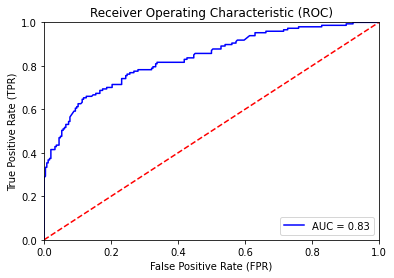

In [ ]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

We want the blue line as far away from the red line as possible, ours is far enough way to be considered fairly accurate. With a Area under the curve score of 83%

In [ ]:
print(log_regress.intercept_)
print(log_regress.coef_)
df.columns

[2.40459766]
[[-9.60590016e-01  2.52778566e+00 -3.55421447e-02  1.70577099e-03
  -2.83095781e-01 -1.63472530e-01]]


Index(['pclass', 'survived', 'sex', 'age', 'fare', 'embarked', 'familySize'], dtype='object')

**The model comes out to be**

$$Prob(pclass, sex, age, fare, embarked, familySize) = \frac{1}{1+e^{-(2.40459766+(-0.960590016){pclass}+(2.52778566){sex}+(-0.0355421447){age}+(0.00170577099){fare}+ (-0.283095781){embarked} + (-0.163472530){familySize})}}$$